<a href="https://colab.research.google.com/github/vigneshwarjayabal/AI_And_Ml/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Definition of Regression**

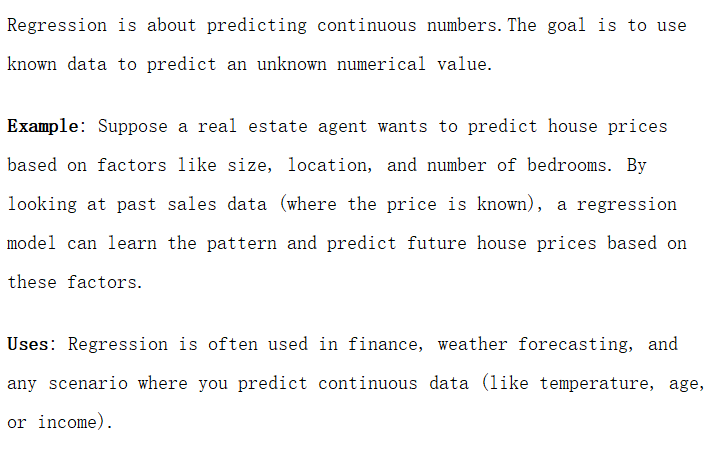

In [ ]:
# Output : The output of a regression model is a continuous
# value. For example, in predicting house prices, the output might
# be a price in dollars.

In [ ]:
# Algorithms : Common regression algorithms include linear
# regression, polynomial regression, decision trees, support
# vector regression (SVR), and various neural network
# architectures.

In [ ]:
#  Evaluation : Regression models are evaluated using metrics
# like mean squared error (MSE), mean absolute error (MAE),
# root mean squared error (RMSE), and R-squared (coefficient of
# determination).

# Loss Function : Mean squared error (MSE) is a widely used
# loss function for training regression models. It measures the
# average squared difference between predicted and actual
# values.

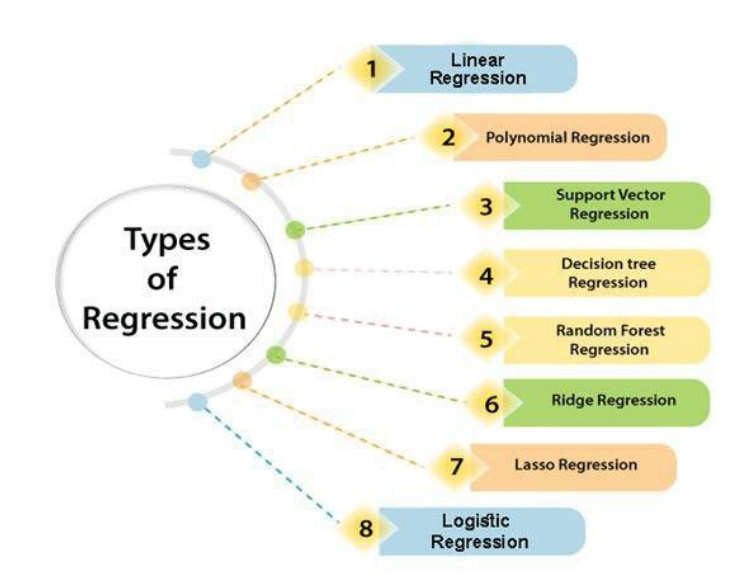

#**Linear Regression**

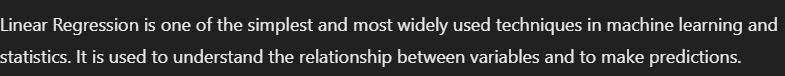

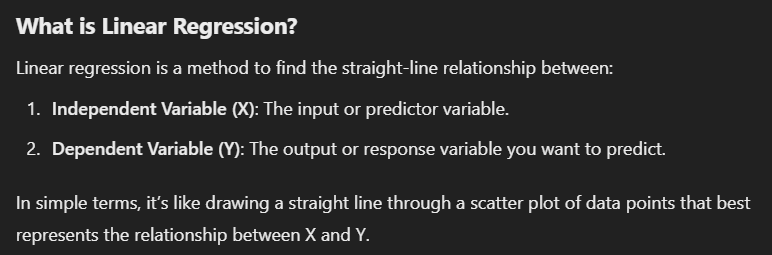

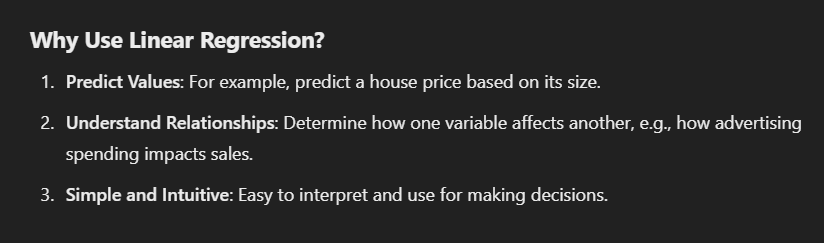

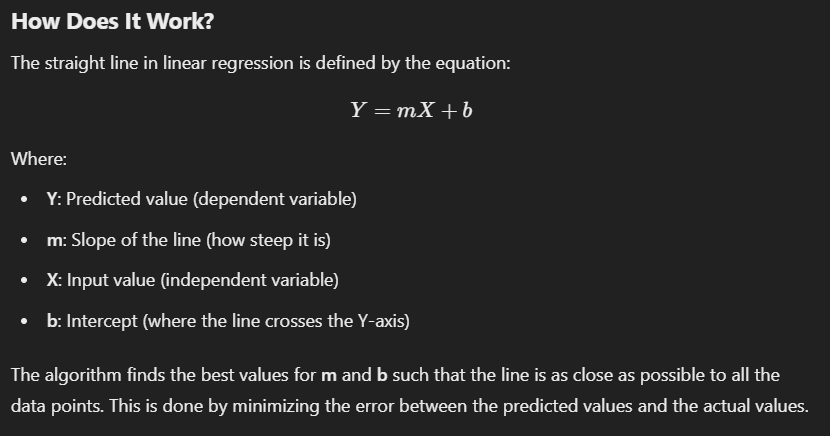

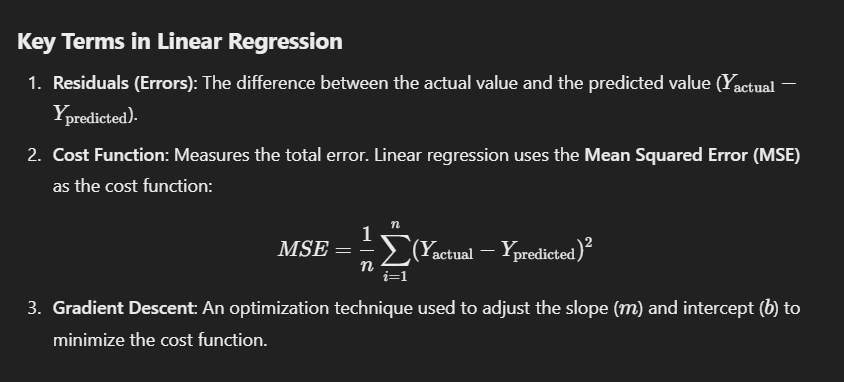

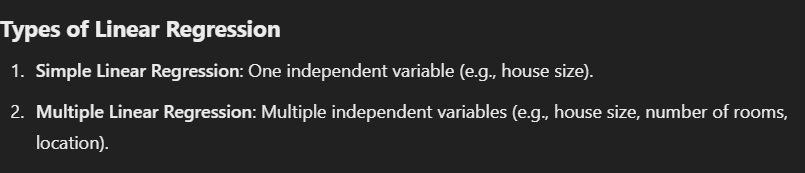

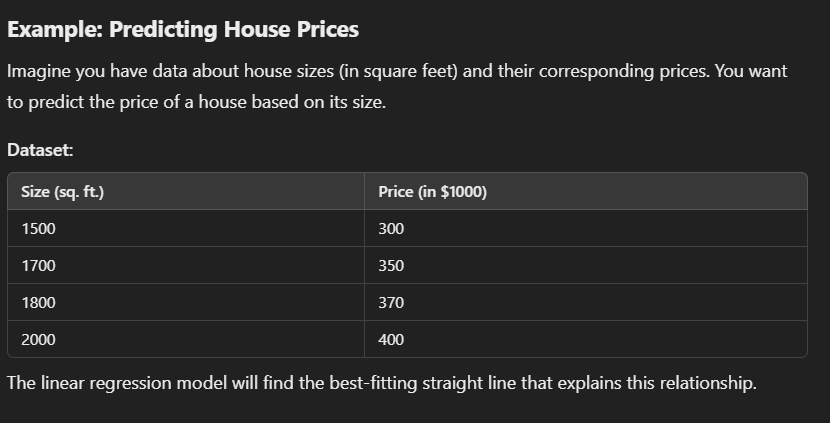

Slope (m): [0.20263158]
Intercept (b): -1.3157894736842195


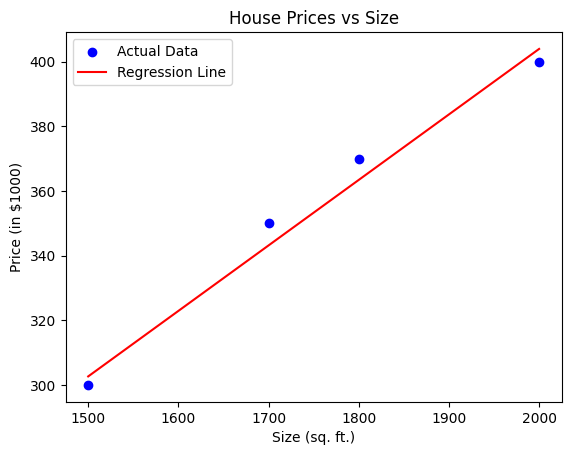

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Data: House sizes (X) and Prices (Y)
X = np.array([1500, 1700, 1800, 2000]).reshape(-1, 1)  # Independent variable (house sizes)
Y = np.array([300, 350, 370, 400])  # Dependent variable (house prices)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Create a Linear Regression model and train it
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict house prices
Y_pred = model.predict(X_test)

# Print model parameters
print("Slope (m):", model.coef_)
print("Intercept (b):", model.intercept_)

# Plot the data and the regression line
plt.scatter(X, Y, color='blue', label='Actual Data')  # Actual data points
plt.plot(X, model.predict(X), color='red', label='Regression Line')  # Regression line
plt.title("House Prices vs Size")
plt.xlabel("Size (sq. ft.)")
plt.ylabel("Price (in $1000)")
plt.legend()
plt.show()


#**Ordinary Least Squares**

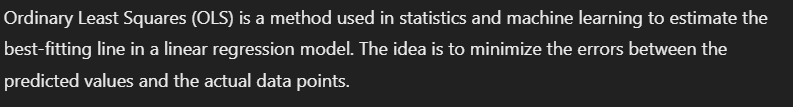

In [ ]:
#1. DAta availability
#2. Defining Independent and dependent variable
#3. Exploring the data(optional)
#4. Matching the data according to the template equation(yhat =B0+B1*X1)
#5. Build a model
#6. Train the data for that model
#7. check sumamry
#8. Explore the result of train model
#9. Identify the best fit model based on the equation

In [2]:
import pandas as pd

df = pd.read_csv('/content/slr.csv')

df

,Exam,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [ ]:

# x ----> independent variable = Exam
# y ----> Actul dependent variable = GPA
# yhat ----> predicter dependent variable

# yhat = b0 + b1*x1



In [3]:
x1 = df["Exam"]
y = df['GPA']

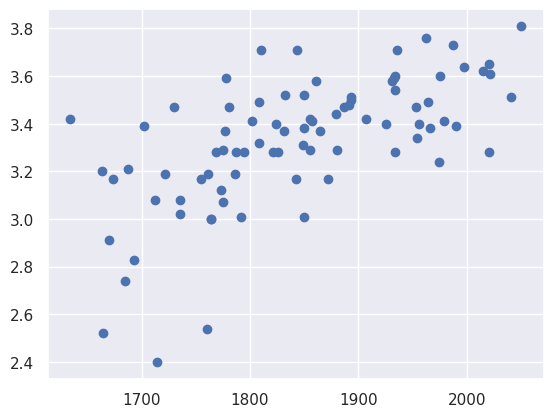

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.scatter(x1,y)
plt.show()

In [5]:
import statsmodels.api as sm
x= sm.add_constant(x1)
x

,const,Exam
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


In [6]:
model = sm.OLS(y,x)

In [7]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           7.20e-11
Time:                        11:16:07   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
Exam           0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
yhat=0.2750+(0.0017*x1)

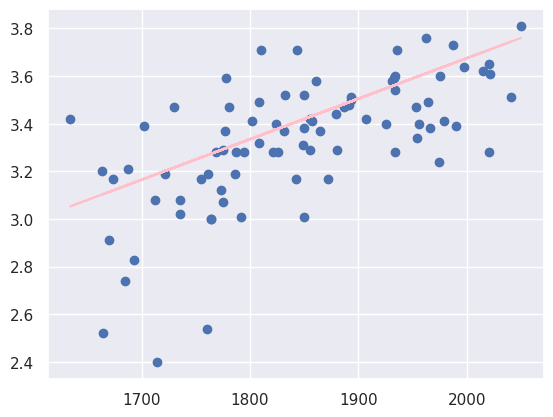

In [9]:
plt.scatter(x1,y) #step 8
plt.plot(x1,yhat,color="pink")
plt.show()

In [10]:
yhat1=0.2750+(0.0018*x1)

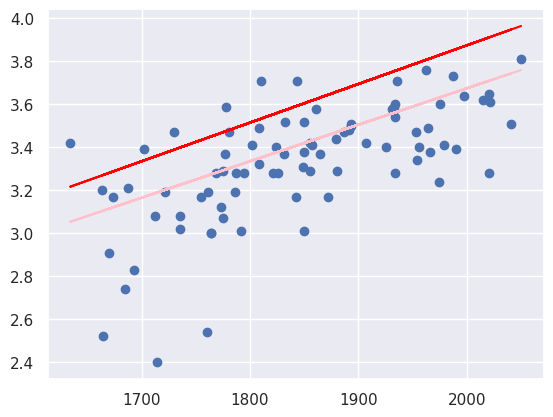

In [11]:
plt.scatter(x1,y)
plt.plot(x1,yhat,color="pink")
plt.plot(x1,yhat1,color="red")
plt.show()

In [12]:
result.params

,0
const,0.275040
Exam,0.001656


In [13]:
result.params[0],result.params[1]

<ipython-input-13-7dc3779c01ea>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.params[0],result.params[1]


(0.27504029966028876, 0.0016556880500928112)

In [14]:
yhat_original=result.params[0]+(result.params[1]*x1)

<ipython-input-14-84eaea24c937>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat_original=result.params[0]+(result.params[1]*x1)


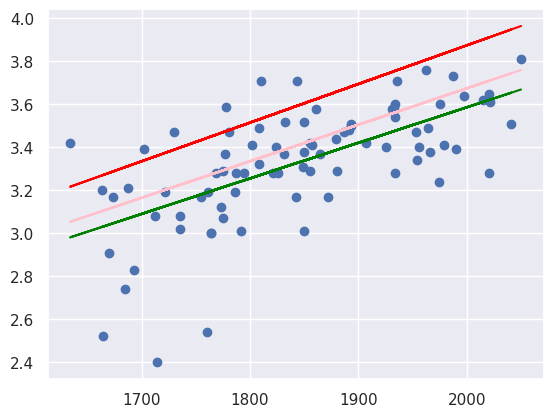

In [15]:
plt.scatter(x1,y) #step 9
plt.plot(x1,yhat,color="pink")
plt.plot(x1,yhat1,color="red")
plt.plot(x1,yhat_original,color="green")
plt.show()

In [ ]:
# SST/TSS - Sum of squares of Total / Total Sum of Squares:
# ------------------------------
# 1. The difference between the actual point and the mean(average) point.
# 2. We are squaring the result to avoid the negative result.
# 3. To measure the total variability of the data set. (Mathematician perspective)


# SSR/ESS - Sum of Squares of Regression / Explained Sum of Squares:
# ---------------------------------------------------------------------
# 1. The difference between the predicted and the mean.
# 2. To measure the explained variability based on the line(best fit line) (Mathematician perspective)


# SSE/RSS - Sum of Squares of Error / Residual Sum of Squares / Remaining Sum of Squares:
# --------------------------------------------------------------------------
# 1. The difference between the actual and the predicted point.
# 2. To measure the unexplained variability by the equation. (Mathematician perspective)


# # **SST = SSR + SSE**
# - If SSE is too low then it is advisable (more accuracy toward the actual and predict)
#- If SSE is too high then it is not advisable (less accuracy toward the actual and predict)
# - If actual and predictor are same then SSE is zero (theoritically)




#**Explaining SST, SSR, and SSE**

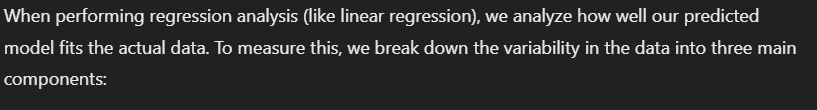

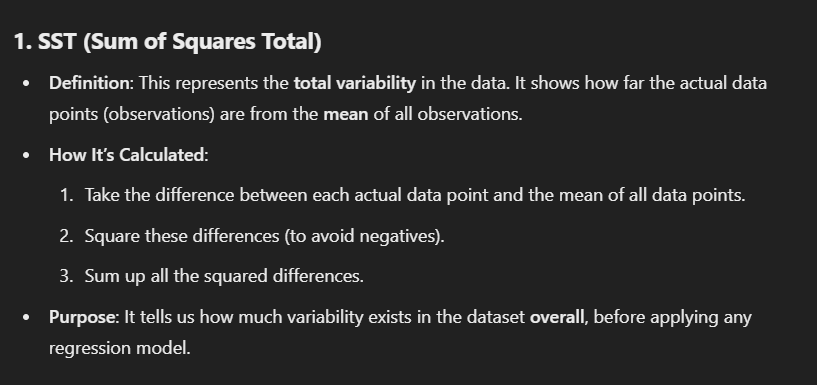

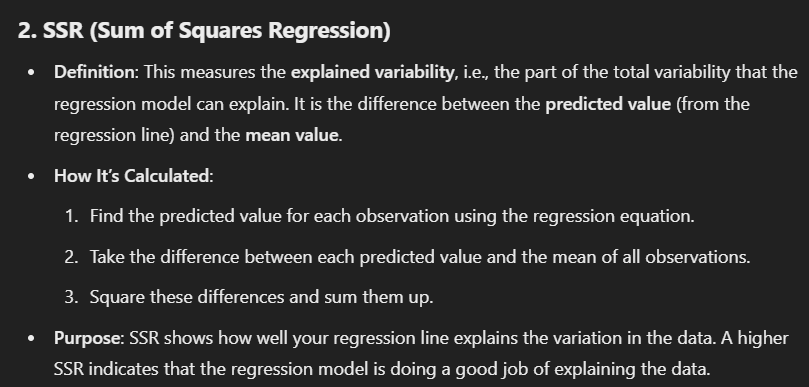

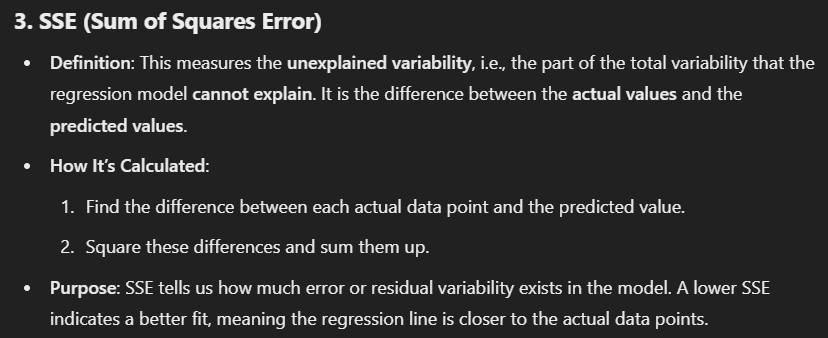

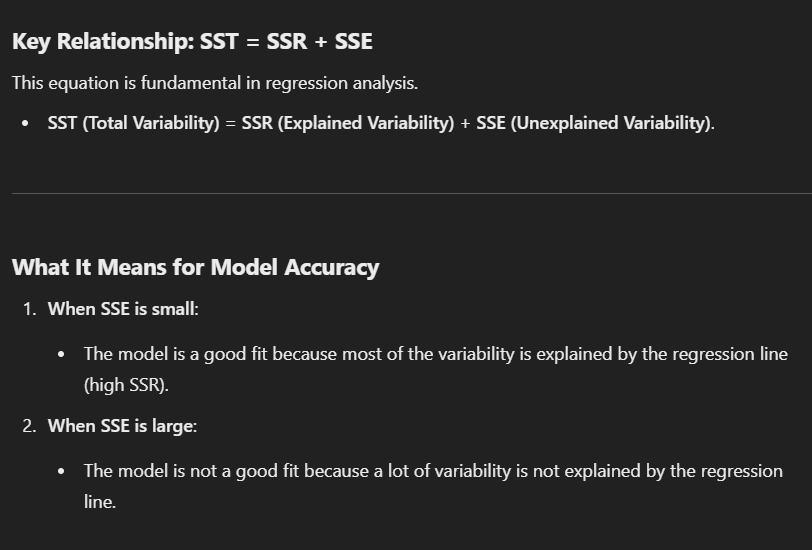

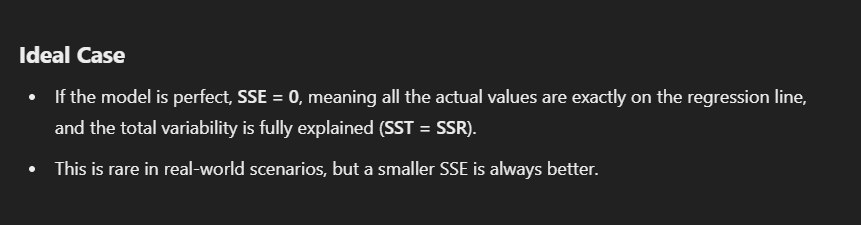